<a href="https://colab.research.google.com/github/Anjalimandal16/Visualizing-Monkey-Pox-Data-set/blob/main/Visualizing_Time_Series_Dataset_COVID_19_Data_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

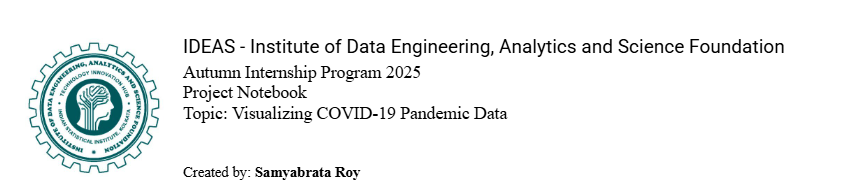

# Notebook: 1

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---



##📖 Introduction

When the COVID-19 pandemic began, the world was flooded with numbers — daily cases, recoveries, deaths, and later vaccinations. Looking at endless tables of figures wasn’t just boring, it was confusing.

But the moment those numbers were drawn into curves, bars, and maps, they started to make sense. Suddenly, we could see when cases were rising, where outbreaks were spreading, and how vaccinations were helping. The data wasn’t just numbers anymore — it was a story of how the world was coping.

That’s the real power of visualization. It’s not about making charts look pretty — it’s about making data human, so that anyone, not just experts, can understand what’s happening.

In this notebook, we’ll take COVID-19 data and learn step by step how to explore and visualize it using Python. Some of the code will be ready for you, while some parts will be left for you to try on your own. By the end, you’ll see how visualization can transform raw data into meaningful insights — and how those insights help us understand events that shape our lives.



---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily COVID-19 cases.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [14]:
# Replace with your Google Drive file ID which has public view access
file_id = "1Sj3Il94NXun9owedSWNGrxszjpAXTDEQ"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_covid = pd.read_csv(url)

  # Show first few rows
  print(df_covid.head())
except Exception as e:
    print(f"Error loading data: {e}")

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BD  Bangladesh       SEAR        0.0   
3    2020-01-04           BB    Barbados        AMR        NaN   
4    2020-01-04           BR      Brazil        AMR        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         0.0                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


## Subsetting the Dataset for Analysis

To simplify the study, I will take a subset of the dataset containing only the most relevant columns:

- **Date_reported**
- **Country**
- **WHO_region**
- **New_cases**
- **New_deaths**
- **Cumulative_cases**
- **Cumulative_deaths**

This subset will allow me to focus on the essential variables required for exploratory data analysis (EDA).  


In [15]:
# Subsetting the dataset for analysis
subset_cols = [
    "Date_reported",
    "Country",
    "WHO_region",
    "New_cases",
    "New_deaths",
    "Cumulative_cases",
    "Cumulative_deaths"
]

df_covid_subset = df_covid[subset_cols].copy()

### Date Trimming  

Since our dataset contains records over a wide range of dates, we may not always need the full timeline for analysis.  
To make the dataset more relevant and manageable, we will **filter the data based on a specific date range**.  

This allows us to:  
- Focus on a particular period of interest (e.g., second wave, third wave, or vaccination drive).  
- Reduce noise from irrelevant dates.  
- Improve the clarity of visualizations by narrowing down to meaningful time windows.  

By trimming the data to the required start and end dates, we ensure that our analysis stays **targeted and insightful**.  

#### Here start date is chosen as 1st of Mar 2020 & end date is choosen as 31st of Aug 2023 as according to WHO, they stopped requiring daily basis data reporting since August 2023

In [16]:
# Assuming your dataframe is named df and Date_reported is already in datetime format
df_covid_subset['Date_reported'] = pd.to_datetime(df_covid_subset['Date_reported'])

# Define the date range
start_date = "2020-03-01"
end_date = "2023-08-31"

# Filter the rows
df_covid_trimmed = df_covid_subset[(df_covid_subset['Date_reported'] >= start_date) & (df_covid_subset['Date_reported'] <= end_date)]

# Check subset
print("Subset shape:", df_covid_trimmed.shape)
print(df_covid_trimmed.head())
print(df_covid_trimmed.tail())

Subset shape: (306960, 7)
      Date_reported  Country WHO_region  New_cases  New_deaths  \
13680    2020-03-01    Yemen        EMR        NaN         NaN   
13681    2020-03-01  Uruguay        AMR        NaN         NaN   
13682    2020-03-01  Ukraine        EUR        NaN         NaN   
13683    2020-03-01  Tunisia        EMR        NaN         NaN   
13684    2020-03-01    Sudan        EMR        NaN         NaN   

       Cumulative_cases  Cumulative_deaths  
13680                 0                  0  
13681                 0                  0  
13682                 0                  0  
13683                 0                  0  
13684                 0                  0  
       Date_reported                           Country WHO_region  New_cases  \
320635    2023-08-31                        Tajikistan        EUR        NaN   
320636    2023-08-31                         Sri Lanka       SEAR        0.0   
320637    2023-08-31                   Solomon Islands        WPR  

## EDA including visualization

In the EDA, I will perform the following visualizations:

1. **Line plots for daily cases in the top 5 affected countries**  
   (Initially with Matplotlib to highlight limitations, then with Plotly for interactivity).

2. **Stacked bar chart for new cases vs new deaths by WHO region**  
   (To show region was more saceptable to COVID-19).  

3. **Heatmap of case intensity by date and region**  
   (To visualize hotspots and the spread over time).  




---


### Plot 1

This code identifies the top 5 countries with the highest cumulative COVID-19 cases, filters their data, and then plots line graphs of daily new cases over time for each of those countries using Matplotlib.

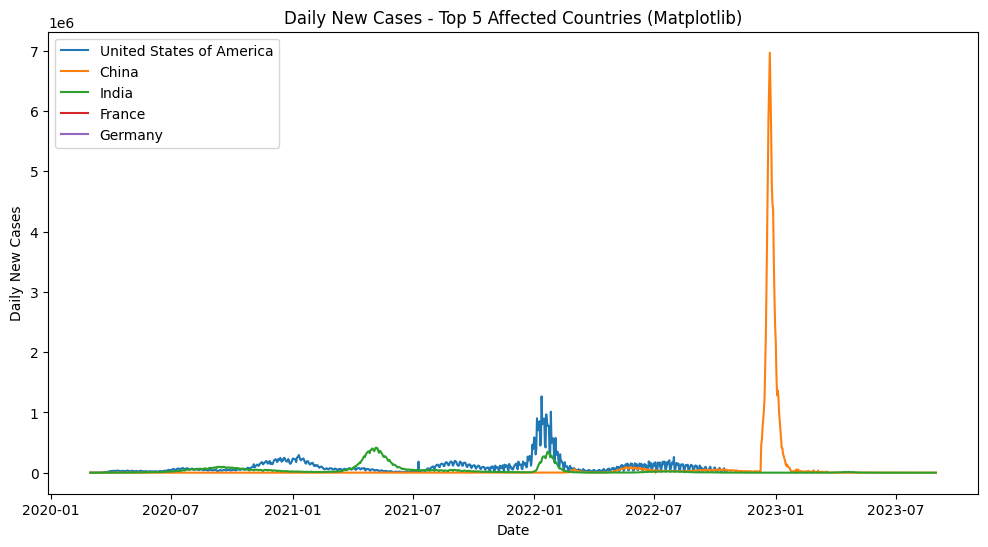

In [17]:
# 1. Line plots for daily cases in the top 5 affected countries

# Find top 5 affected countries by cumulative cases
top5_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
df_top5 = df_covid_trimmed[df_covid_trimmed["Country"].isin(top5_countries)]

# Plotting the data based on daily new cases
plt.figure(figsize=(12,6))
for country in top5_countries:
    country_data = df_top5[df_top5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Affected Countries (Matplotlib)")
plt.legend()
plt.show()


**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



## Question:
What we should have done instade to plot the top 5 countries least affected by COVID-19?

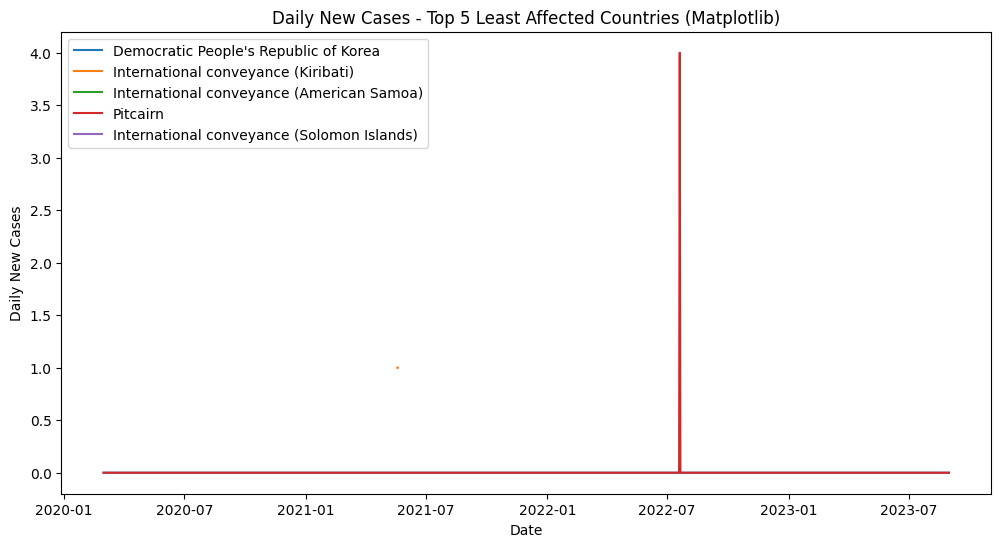

In [18]:
# Compute cumulative cases if missing
df_covid_trimmed = df_covid_trimmed.sort_values(["Country", "Date_reported"])
df_covid_trimmed["Cumulative_cases"] = df_covid_trimmed.groupby("Country")["New_cases"].cumsum()

# Find top 5 least affected countries (lowest cumulative cases overall)
least5_countries = (
    df_covid_trimmed.groupby("Country")["Cumulative_cases"]
    .max()
    .sort_values(ascending=True)   # ascending → least affected
    .head(5)
    .index
)

# Filter only those countries
df_least5 = df_covid_trimmed[df_covid_trimmed["Country"].isin(least5_countries)]

# Plot daily new cases for these countries
plt.figure(figsize=(12,6))
for country in least5_countries:
    country_data = df_least5[df_least5["Country"] == country]
    plt.plot(country_data["Date_reported"], country_data["New_cases"], label=country)

plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily New Cases - Top 5 Least Affected Countries (Matplotlib)")
plt.legend()
plt.show()




### Task

Create a line plot which shows daily global new cases as one dramatic mountain shape

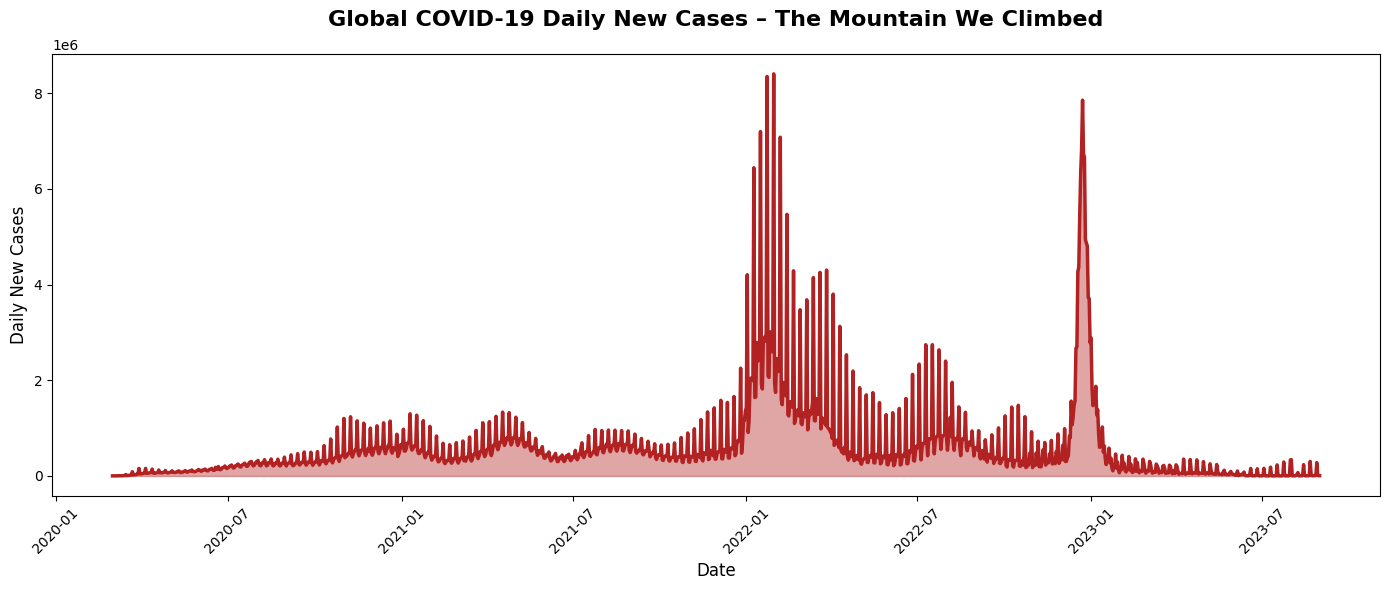

In [19]:
import matplotlib.pyplot as plt

# 1. Aggregate global daily new cases
global_daily = df_covid_trimmed.groupby("Date_reported")["New_cases"].sum().reset_index()

# 2. Create line plot
plt.figure(figsize=(14,6))
plt.plot(global_daily["Date_reported"], global_daily["New_cases"],
         color="firebrick", linewidth=2.5)

# 3. Style for dramatic "mountain"
plt.fill_between(global_daily["Date_reported"], global_daily["New_cases"],
                 color="firebrick", alpha=0.4)

# 4. Labels and title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily New Cases", fontsize=12)
plt.title("Global COVID-19 Daily New Cases – The Mountain We Climbed",
          fontsize=16, fontweight="bold", pad=20)

# X ticks rotation for clarity
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()





---

### Plot 2

This code aggregates COVID-19 new cases and deaths by quarter and visualizes them using a stacked bar chart, where deaths are shown on top of cases. It highlights the timeline of the pandemic’s impact, making it easier to compare peaks and proportions across different periods.

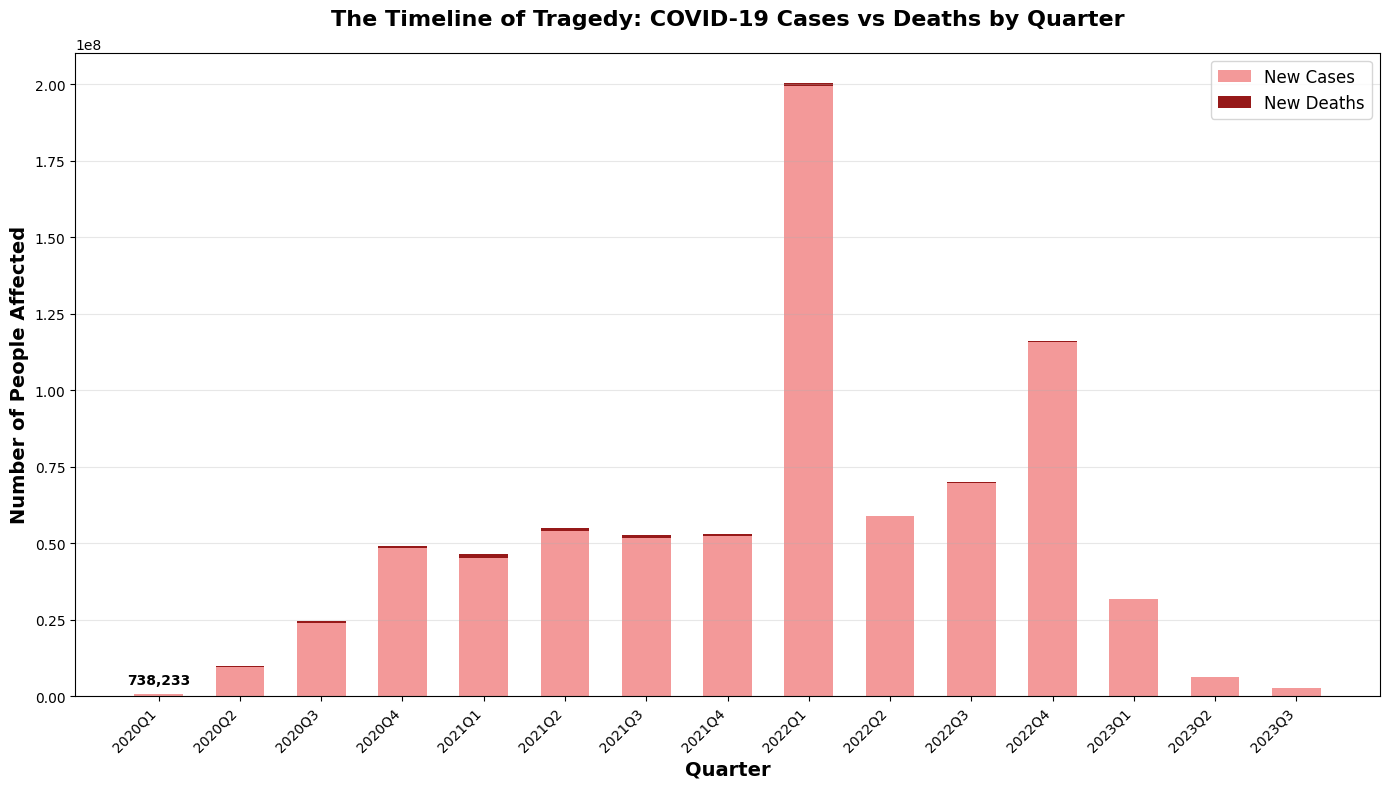

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [20]:
# Cases vs Deaths Over Time (Quarterly)

# Show the relationship between cases and deaths over time periods

# Create quarterly data for cleaner visualization
df_copy = df_covid_trimmed.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')

# Aggregate by quarter
quarterly_data = df_copy.groupby('Quarter').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

# Convert period to string for plotting
quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars
width = 0.6
cases_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_cases'],
                       width, label='New Cases', color='lightcoral', alpha=0.8)
deaths_bars = ax.bar(quarterly_data['Quarter_str'], quarterly_data['New_deaths'],
                        width, bottom=quarterly_data['New_cases'],
                        label='New Deaths', color='darkred', alpha=0.9)

# Customize the plot
ax.set_title('The Timeline of Tragedy: COVID-19 Cases vs Deaths by Quarter',
                fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value annotations on the bars
for i, (cases, deaths) in enumerate(zip(quarterly_data['New_cases'], quarterly_data['New_deaths'])):
  # Annotate total at the top
  total = cases + deaths
  ax.annotate(f'{total:,.0f}',
                xy=(i, total),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontweight='bold', fontsize=10)

  plt.tight_layout()
  plt.show()

  # Print insights
  max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
  max_cases = quarterly_data['New_cases'].max()



**Note:** On the y-axis, `1e6` means **1 million (1,000,000)** and `1e8` means **100 million (100,000,000)**.


---



### Task

Convert the above chart to double bar chart with the same data

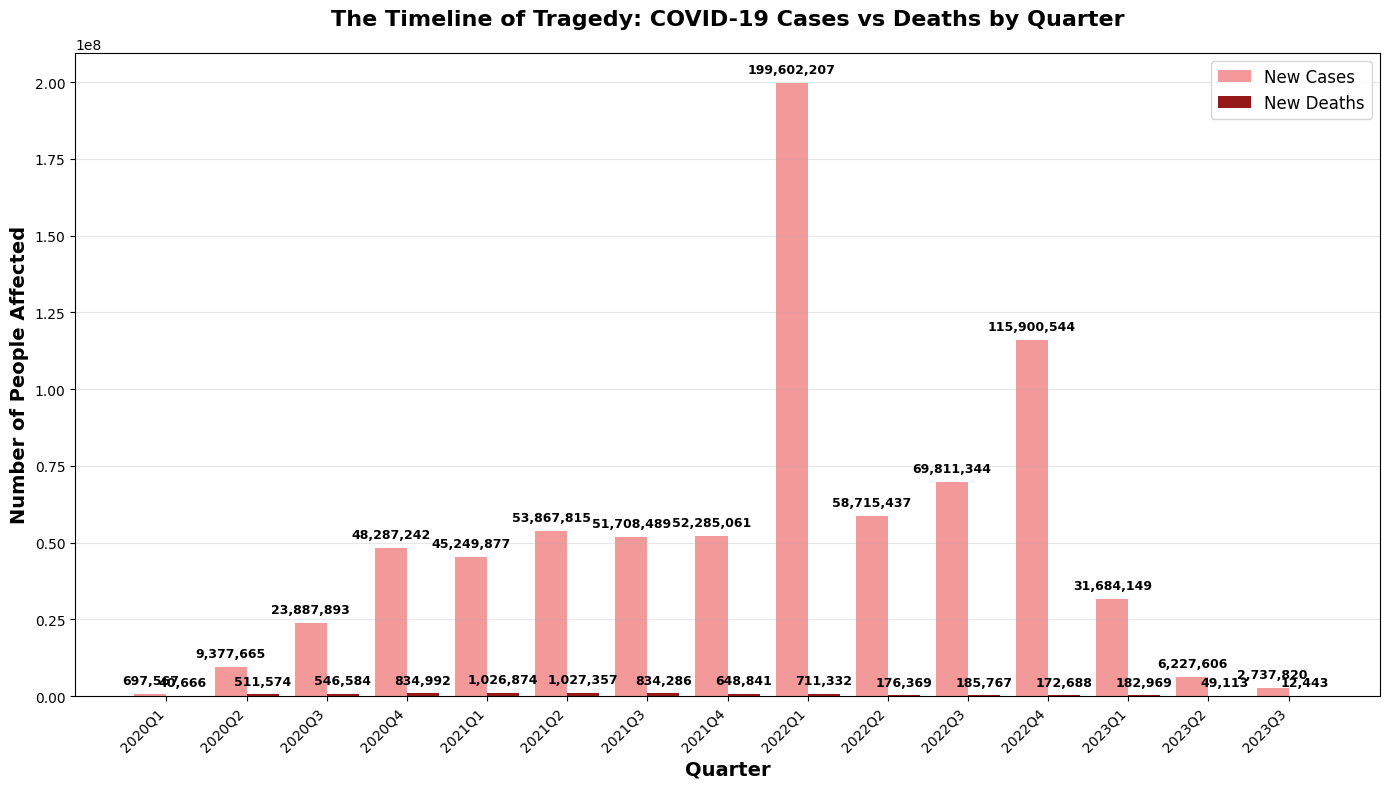

Highest number of cases was in 2022Q1 with 199,602,207 cases.


In [21]:
import matplotlib.pyplot as plt


df_copy = df_covid_trimmed.copy()
df_copy['Quarter'] = df_copy['Date_reported'].dt.to_period('Q')

quarterly_data = df_copy.groupby('Quarter').agg({
    'New_cases': 'sum',
    'New_deaths': 'sum'
}).reset_index()

quarterly_data['Quarter_str'] = quarterly_data['Quarter'].astype(str)


fig, ax = plt.subplots(figsize=(14, 8))

x = range(len(quarterly_data))
width = 0.4

cases_bars = ax.bar([i - width/2 for i in x], quarterly_data['New_cases'],
                    width, label='New Cases', color='lightcoral', alpha=0.8)

deaths_bars = ax.bar([i + width/2 for i in x], quarterly_data['New_deaths'],
                     width, label='New Deaths', color='darkred', alpha=0.9)


ax.set_title('The Timeline of Tragedy: COVID-19 Cases vs Deaths by Quarter',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of People Affected', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data['Quarter_str'], rotation=45, ha='right')
ax.legend(fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)


for i, (cases, deaths) in enumerate(zip(quarterly_data['New_cases'], quarterly_data['New_deaths'])):
    ax.annotate(f'{cases:,.0f}',
                xy=(i - width/2, cases),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax.annotate(f'{deaths:,.0f}',
                xy=(i + width/2, deaths),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

max_quarter = quarterly_data.loc[quarterly_data['New_cases'].idxmax(), 'Quarter_str']
max_cases = quarterly_data['New_cases'].max()
print(f"Highest number of cases was in {max_quarter} with {max_cases:,.0f} cases.")


### Task

Construct a pie chart which Shows just top 10 countries mostly affected by COVID-19 ( by cummulative deaths)

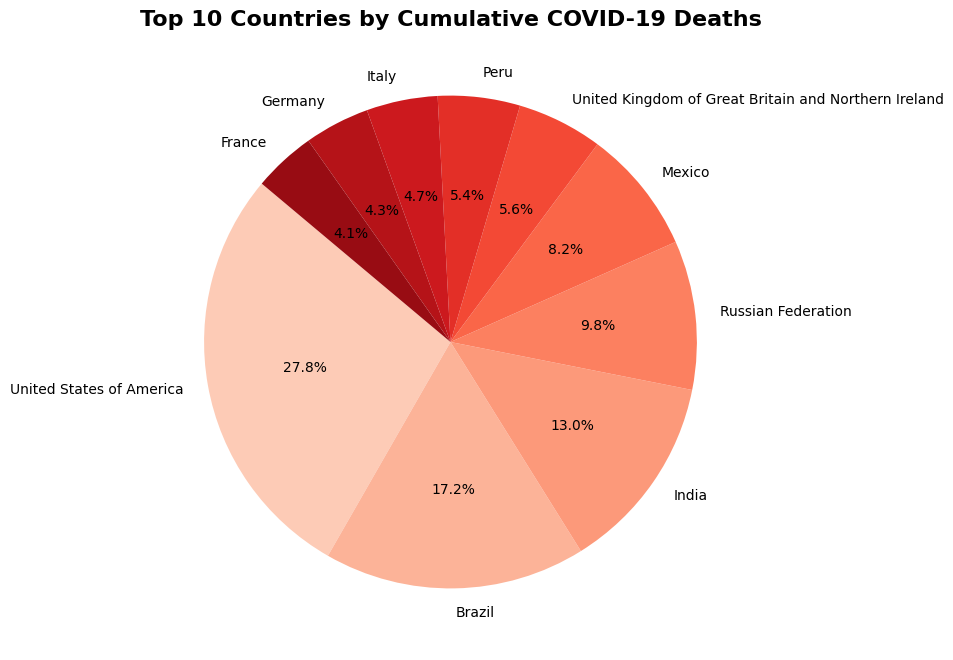

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_covid is your full dataset with cumulative values
# If dataset only has daily values, aggregate deaths per country
deaths_by_country = df_covid_trimmed.groupby("Country")["New_deaths"].sum().reset_index()

# Get top 10 countries by total deaths
top10_deaths = deaths_by_country.sort_values("New_deaths", ascending=False).head(10)

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(top10_deaths["New_deaths"],
        labels=top10_deaths["Country"],
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.Reds(range(50, 250, 20)))

plt.title("Top 10 Countries by Cumulative COVID-19 Deaths", fontsize=16, fontweight="bold")
plt.show()




---

### Plot 3

We aggregated monthly COVID-19 new cases by WHO region and visualized them using a heatmap.
This highlights when and where case surges were most intense across different regions.

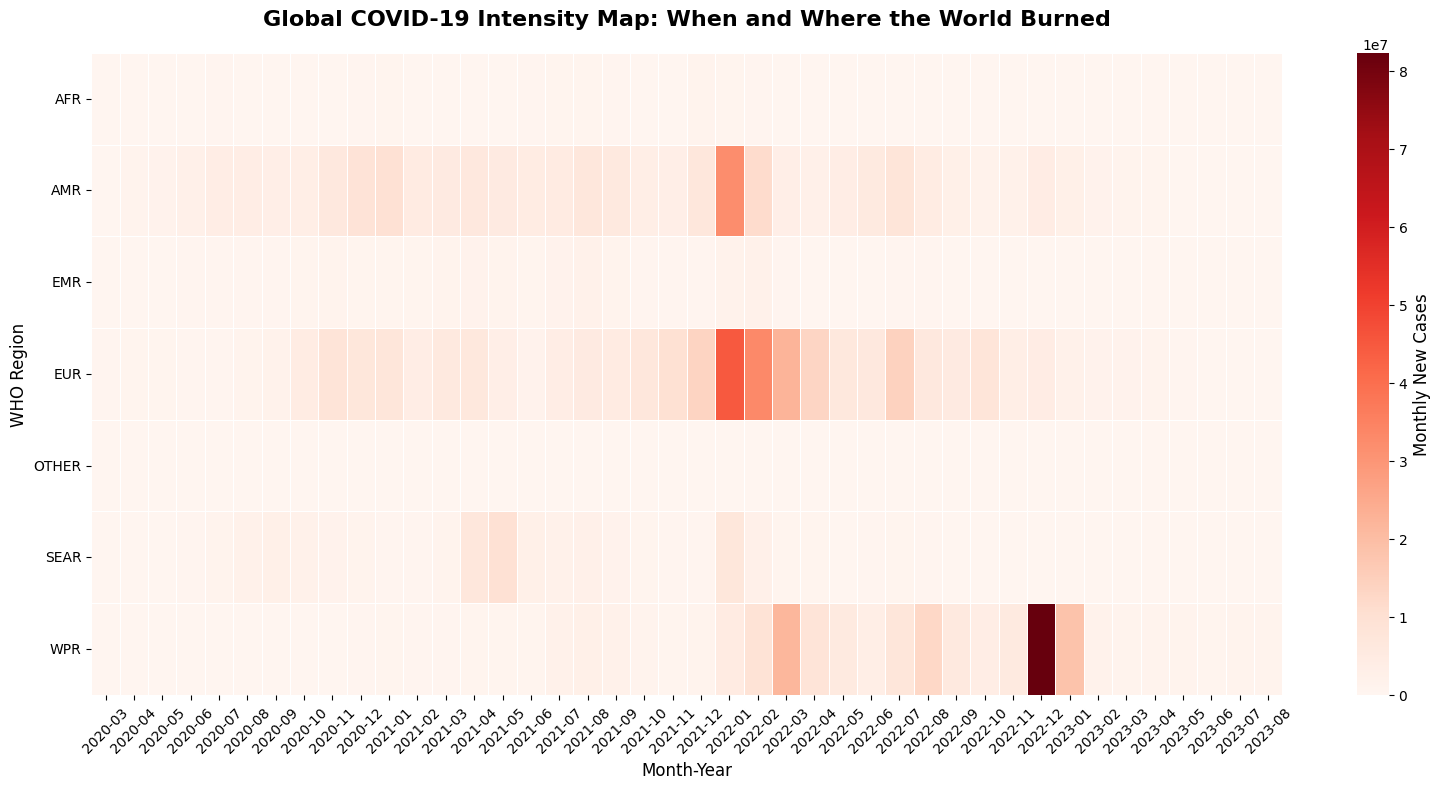

In [ ]:
#Create a powerful heatmap showing intensity across regions and time
# Create monthly data for cleaner visualization
df_monthly = df_covid_trimmed.copy()
df_monthly['Month_Year'] = df_monthly['Date_reported'].dt.to_period('M')

# Aggregate by WHO region and month
heatmap_data = df_monthly.groupby(['WHO_region', 'Month_Year'])['New_cases'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='WHO_region', columns='Month_Year', values='New_cases')

# Fill missing values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))

# Use a dramatic color scheme
sns.heatmap(heatmap_pivot,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global COVID-19 Intensity Map: When and Where the World Burned',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()

### Task:

1) Visualize another heatmap showing quaterly new deaths' intensity by regions.
2) Visualize a heatmap showing monthly new cases' intensity by top 10 countries

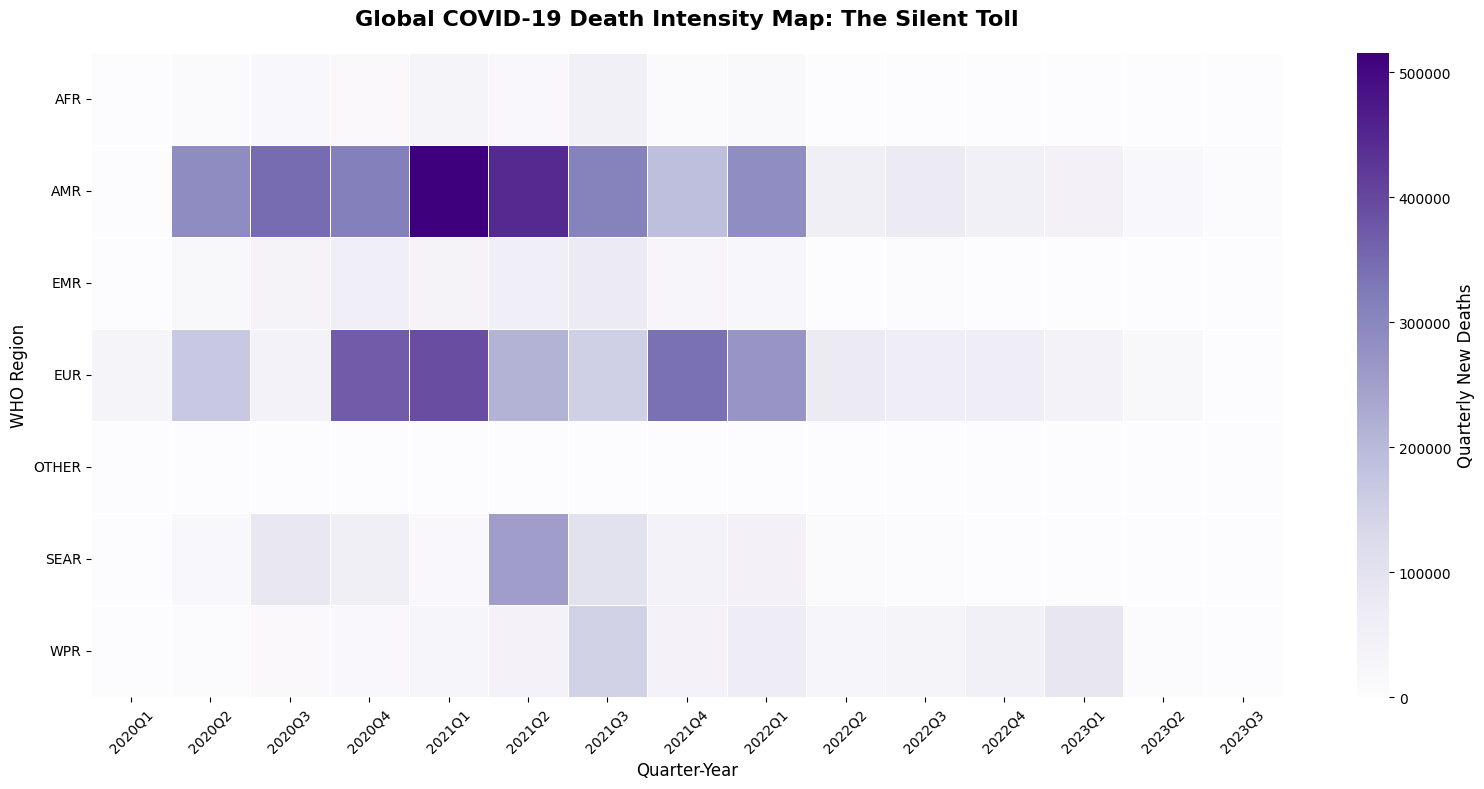

In [ ]:
# Create quarterly data
df_quarterly = df_covid_trimmed.copy()
df_quarterly['Quarter_Year'] = df_quarterly['Date_reported'].dt.to_period('Q')

# Aggregate by WHO region and quarter for new deaths
heatmap_data_deaths = df_quarterly.groupby(['WHO_region', 'Quarter_Year'])['New_deaths'].sum().reset_index()

# Pivot for heatmap
heatmap_pivot_deaths = heatmap_data_deaths.pivot(index='WHO_region', columns='Quarter_Year', values='New_deaths')

# Fill missing values with 0
heatmap_pivot_deaths = heatmap_pivot_deaths.fillna(0)

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_pivot_deaths,
            cmap='Purples',
            cbar_kws={'label': 'Quarterly New Deaths'},
            linewidths=0.5,
            linecolor='white')

plt.title('Global COVID-19 Death Intensity Map: The Silent Toll',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quarter-Year', fontsize=12)
plt.ylabel('WHO Region', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add colorbar label
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()


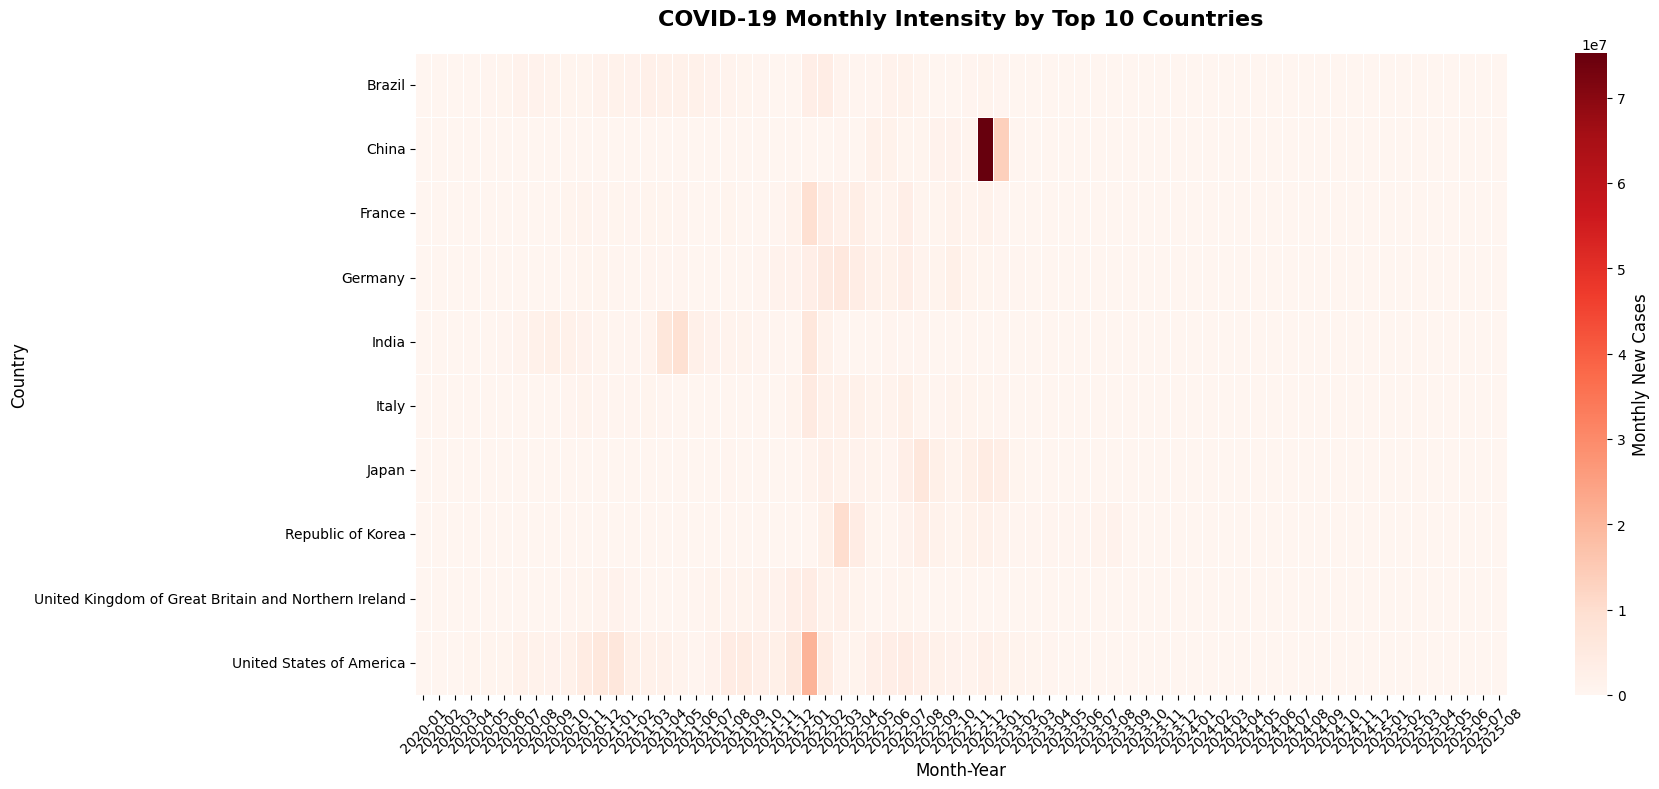

In [ ]:
# Ensure df_covid_trimmed exists
df_covid_trimmed = df_covid[['Date_reported', 'Country', 'WHO_region', 'New_cases', 'New_deaths']].copy()
df_covid_trimmed['Date_reported'] = pd.to_datetime(df_covid_trimmed['Date_reported'])

# Create Month-Year column
df_covid_trimmed['Month_Year'] = df_covid_trimmed['Date_reported'].dt.to_period('M')

# Aggregate by country and month
country_monthly = df_covid_trimmed.groupby(['Country', 'Month_Year'])['New_cases'].sum().reset_index()
# Find top 10 countries with the highest total cases
top_countries = country_monthly.groupby('Country')['New_cases'].sum().nlargest(10).index

# Filter only top 10 countries
country_monthly_top10 = country_monthly[country_monthly['Country'].isin(top_countries)]
# Pivot for heatmap
heatmap_pivot_countries = country_monthly_top10.pivot(index='Country',
                                                      columns='Month_Year',
                                                      values='New_cases')

# Fill missing values
heatmap_pivot_countries = heatmap_pivot_countries.fillna(0)

# Plot heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_pivot_countries,
            cmap='Reds',
            cbar_kws={'label': 'Monthly New Cases'},
            linewidths=0.5,
            linecolor='white')

plt.title('COVID-19 Monthly Intensity by Top 10 Countries',
    fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Adjust colorbar font size
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()




---



## Interactive COVID-19 Dashboard with Plotly

In this section, we build an interactive dashboard to explore the COVID-19 dataset using **Plotly**.  
The dashboard allows dynamic filtering, visualization, and comparison of different trends such as  
- **Daily New Cases and Deaths** across regions and countries  
- **Cumulative trends** over time  
- **Stacked bar charts** and **line plots** for deeper insights  

This interactive approach provides users with the flexibility to investigate the data from multiple perspectives,  
making the analysis more engaging and intuitive compared to static charts.


###  About Plotly

**Plotly** is a powerful, open-source Python library that allows us to create **interactive and publication-quality visualizations**—like line plots, bar charts, heatmaps, and more—right inside our notebooks. It enables users to **zoom, hover, and explore data dynamically**, making data storytelling both engaging and intuitive.


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# ---- 1. Line Chart: Global New Cases Over Time ----
fig_cases = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_cases",
    title="Global New COVID-19 Cases Over Time"
)

# ---- 2. Line Chart: Global New Deaths Over Time ----
fig_deaths = px.line(
    df_covid_trimmed.groupby('Date_reported', as_index=False).sum(),
    x="Date_reported",
    y="New_deaths",
    title="Global New COVID-19 Deaths Over Time",
    color_discrete_sequence=["red"]
)

# ---- 3. Stacked Bar Chart: New Cases vs New Deaths grouped by WHO Region ----
region_grouped = df_covid_trimmed.groupby(['Date_reported', 'WHO_region'], as_index=False)[['New_cases', 'New_deaths']].sum()

fig_stacked = go.Figure()
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_cases"],
    name="New Cases",
    marker_color="blue"
))
fig_stacked.add_trace(go.Bar(
    x=region_grouped["Date_reported"],
    y=region_grouped["New_deaths"],
    name="New Deaths",
    marker_color="red"
))

fig_stacked.update_layout(
    barmode="stack",
    title="New Cases vs New Deaths (Stacked) by WHO Region",
    xaxis_title="Date",
    yaxis_title="Count",
)

# ---- 4. Choropleth Map: Total Cases by Country ----
country_grouped = df_covid_trimmed.groupby('Country', as_index=False)['Cumulative_cases'].max()

fig_map = px.choropleth(
    country_grouped,
    locations="Country",
    locationmode="country names",
    color="Cumulative_cases",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Global Distribution of Total COVID-19 Cases"
)

# ---- Display all interactive charts ----
fig_cases.show()
fig_deaths.show()
fig_stacked.show()
fig_map.show()


## Question

Interpret the above map shown.

---



1. Line Chart – Global New COVID-19 Cases Over Time

This chart shows the daily new cases reported worldwide.

The curve typically looks like a “mountain range”:

Initial small bumps in early 2020 when COVID-19 first spread.

Large, steep waves representing major global outbreaks (e.g., Delta and Omicron waves).

Peaks correspond to global surges, while troughs represent periods of decline or lower testing/reporting.

The overall shape tells the story of how COVID-19 spread in waves across the globe.

2. Line Chart – Global New COVID-19 Deaths Over Time

Similar structure to the cases chart but with fewer counts.

Death trends often lag behind cases by a few weeks (infections → hospitalizations → deaths).

Peaks in deaths align with major waves, though sometimes with smaller magnitude compared to cases due to improved treatment, vaccination, or less severe variants.

A drop in deaths despite high cases (e.g., Omicron wave) reflects reduced severity or immunity buildup.

3. Stacked Bar Chart – New Cases vs. New Deaths (Grouped by WHO Region)

This shows how cases and deaths accumulate over time within WHO regions (Africa, Europe, Americas, South-East Asia, Eastern Mediterranean, Western Pacific).

The stacking makes it easy to compare relative contribution of cases vs. deaths.

You’ll see:

Blue (cases) bars dominate in height, since infections vastly outnumber deaths.

Red (deaths) stacked on top are smaller but highlight mortality burden.

Regional surges become visible as thicker stacks in certain periods (e.g., Europe & Americas during 2020–21).

This view is useful to compare the burden across regions and over time.

4. Choropleth Map – Total Cases by Country

A world map shaded by cumulative cases.

Darker shades = higher total cases.

Expected observations:

Countries like USA, India, Brazil, Russia appear darkest (highest cumulative burden).

Some smaller or under-reporting nations show lighter shading.

This helps visualize geographic spread and intensity, showing hotspots of the pandemic



---

#Assignment:

Find a similart dataset (e.g. `Ebola | 2014-2016 | Western Africa Ebola Outbreak` ) and extract a similar visualization out of it.





checkout:  `https://www.kaggle.com/datasets/imdevskp/ebola-outbreak-20142016-complete-dataset`

**Monkeypox** **Data** **Visualization**

📖 **Introduction**

Monkeypox is an infectious disease that gained global attention due to its widespread outbreak across multiple countries. Understanding its spread and severity requires effective data analysis and visualization. This project utilizes global data on monkeypox to identify trends, compare impacts across regions, and provide insights into the relationship between cases and deaths. Data visualization helps to track the epidemic’s dynamics, geographical spread, and severity, providing insights for public health response

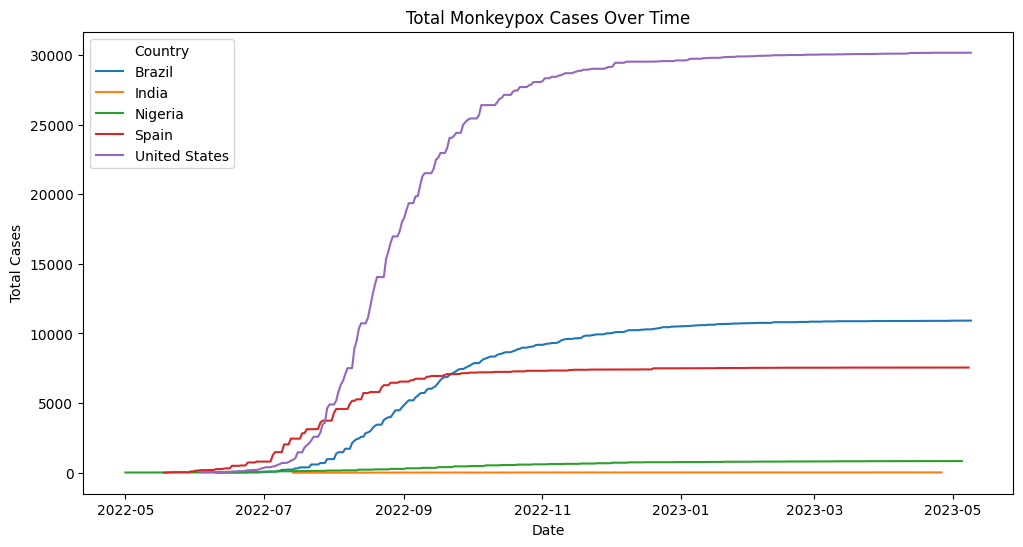

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime



# Google Drive shared link
share_url = "https://drive.google.com/file/d/1CkpJ_HuLsUbTNwncKtTKtg5HPfAa5RQm/view?usp=sharing"

# Extract file id and form direct download url
file_id = share_url.split('/')[-2]
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Use that URL to load into pandas
data = pd.read_csv(download_url)

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Select a few countries for visualization
countries = ["United States", "Brazil", "Spain", "Nigeria", "India"]
filtered = data[data['location'].isin(countries)]

# --- Plot 1: Total cases trend ---
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x="date", y="total_cases", hue="location")
plt.title("Total Monkeypox Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.show()



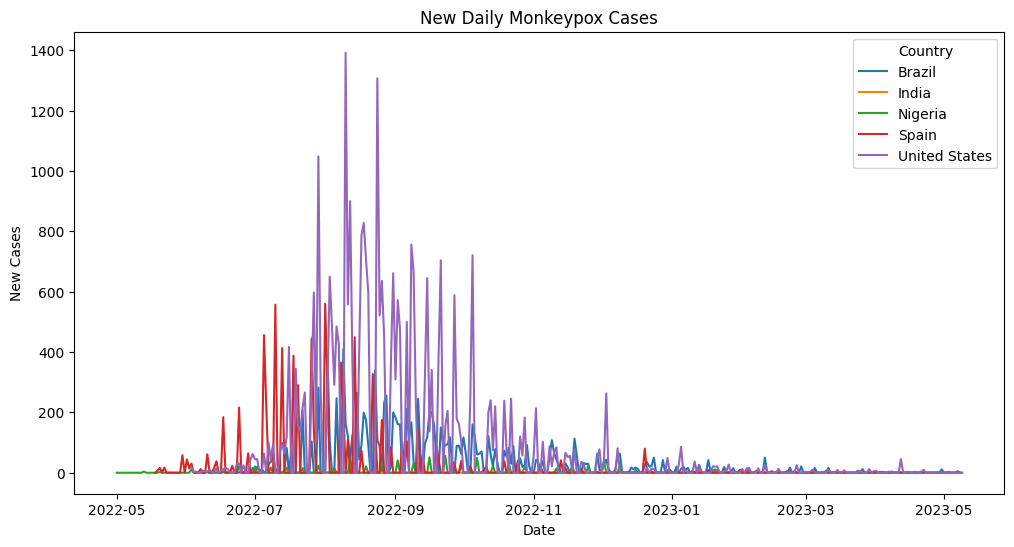

In [24]:
# --- Plot 2: New daily cases trend ---
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x="date", y="new_cases", hue="location")
plt.title("New Daily Monkeypox Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend(title="Country")
plt.show()

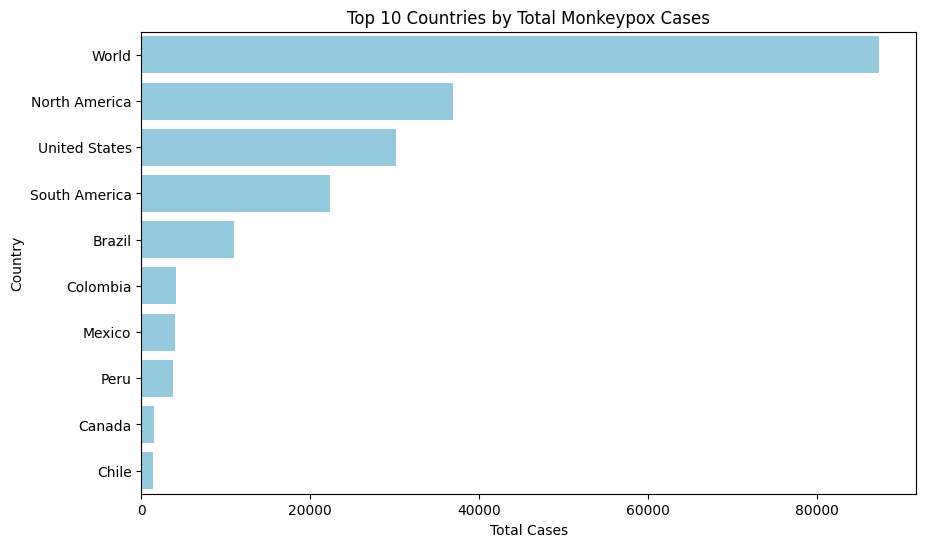

In [25]:
# --- Plot 3: Top 10 countries by total cases (latest date) ---
latest_date = data['date'].max()
latest_data = data[data['date'] == latest_date]
top10 = latest_data.sort_values("total_cases", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x="total_cases", y="location", color="skyblue")
plt.title("Top 10 Countries by Total Monkeypox Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()




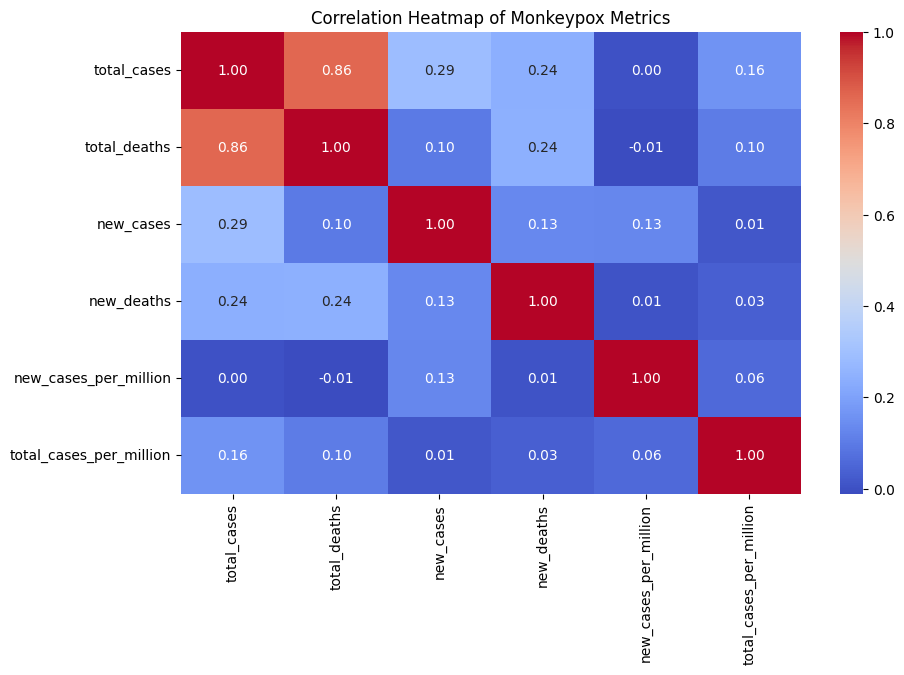

In [26]:
# --- Plot 4: Heatmap of correlation between metrics ---
plt.figure(figsize=(10,6))
corr = data[["total_cases","total_deaths","new_cases","new_deaths",
             "new_cases_per_million","total_cases_per_million"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Monkeypox Metrics")
plt.show()

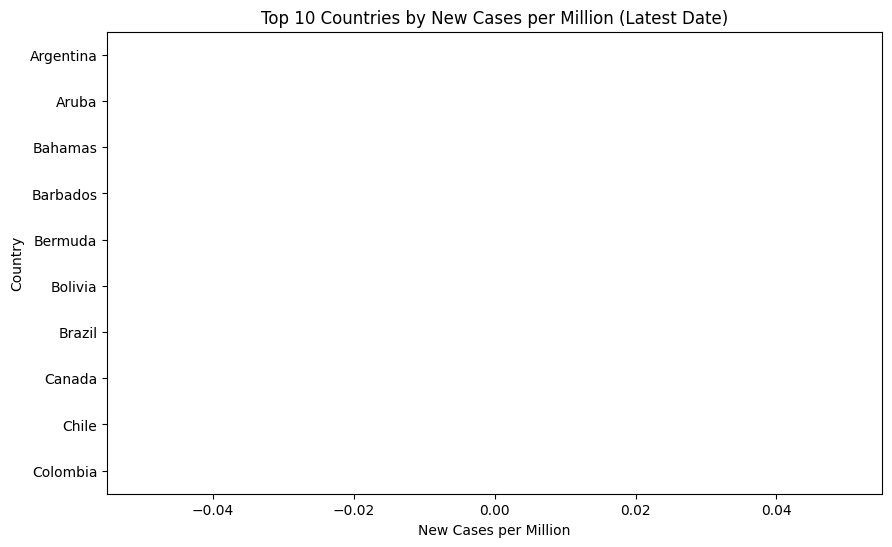

In [27]:
# --- Plot 5: Bar chart of new cases per million (latest date, top 10 countries) ---
top10_per_million = latest_data.sort_values("new_cases_per_million", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_per_million,
    x="new_cases_per_million",
    y="location",
    color="tomato"   # or any matplotlib color
)
plt.title("Top 10 Countries by New Cases per Million (Latest Date)")
plt.xlabel("New Cases per Million")
plt.ylabel("Country")
plt.show()






<Figure size 1200x600 with 0 Axes>

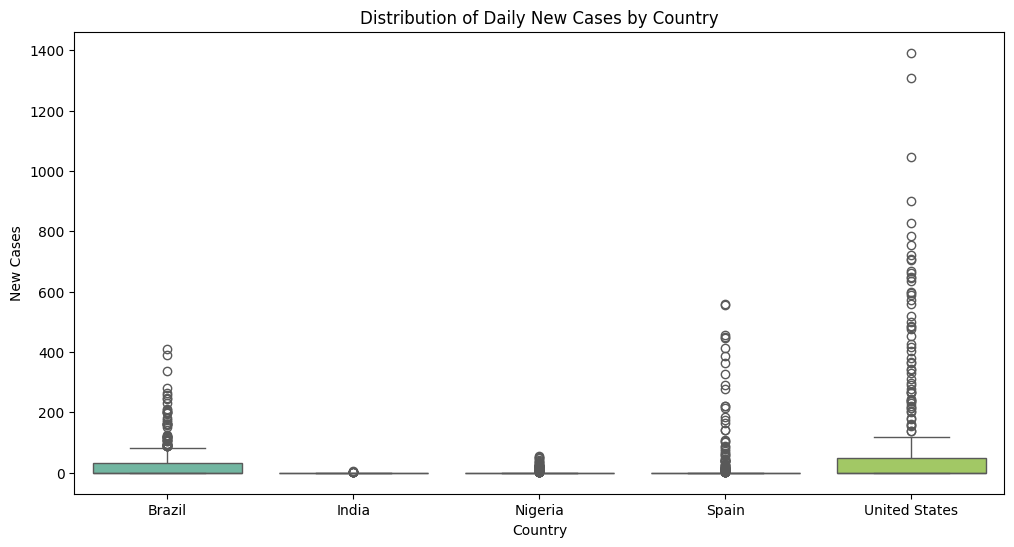

In [28]:
# --- Plot 6: Boxplot of new cases distribution by country ---
plt.figure(figsize=(12,6))
plt.figure(figsize=(12,6))
sns.boxplot(
    data=filtered,
    x="location",
    y="new_cases",
    hue="location",      # map palette to countries
    dodge=False,
    palette="Set2",
    legend=False         # hide duplicate legend
)
plt.title("Distribution of Daily New Cases by Country")
plt.xlabel("Country")
plt.ylabel("New Cases")
plt.show()
